### Iris Flower Classification Using KNN

### Import libraries

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

### Create KNN Classifier

In [3]:
def classify_iris_flowers():
    """Complete example of classifying iris flowers"""
    # Load the famous Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features (important for KNN!)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create and train the model
    knn = KNeighborsClassifier(
        n_neighbors=5,          # Number of neighbors to consider
        weights='uniform',      # All neighbors have equal weight
        metric='euclidean'      # Distance metric to use
    )
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nDetailed Report:")
    print(classification_report(y_test, y_pred,
                              target_names=iris.target_names))
    
    return knn, scaler


### Evaluate the Model

In [4]:
# Run the example
model, scaler = classify_iris_flowers()

Accuracy: 1.0

Detailed Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### test the model with new data

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

new_flowers = [
    [5.0, 3.4, 1.5, 0.2],  # Likely Setosa
    [6.2, 2.9, 4.3, 1.3],  # Likely Versicolor
    [5.9, 3.0, 5.1, 1.8],  # Likely Virginica
    [4.9, 3.0, 1.4, 0.2],  # Likely Setosa
    [6.1, 2.8, 4.0, 1.3],  # Likely Versicolor
    [6.7, 3.1, 5.6, 2.4],  # Likely Virginica
    [5.4, 3.9, 1.7, 0.4],  # Likely Setosa
    [6.0, 2.2, 4.0, 1.0],  # Likely Versicolor
    [6.5, 3.0, 5.2, 2.0],  # Likely Virginica
    [5.1, 3.5, 1.4, 0.3]   # Likely Setosa
]

scaled_flowers = scaler.transform(new_flowers)
predictions = model.predict(scaled_flowers)

for i, pred in enumerate(predictions):
    print(f"Flower {i+1} → Predicted class: {iris.target_names[pred]}")

Flower 1 → Predicted class: setosa
Flower 2 → Predicted class: versicolor
Flower 3 → Predicted class: virginica
Flower 4 → Predicted class: setosa
Flower 5 → Predicted class: versicolor
Flower 6 → Predicted class: virginica
Flower 7 → Predicted class: setosa
Flower 8 → Predicted class: versicolor
Flower 9 → Predicted class: virginica
Flower 10 → Predicted class: setosa


## Using PCA (Princible Component Analysis)

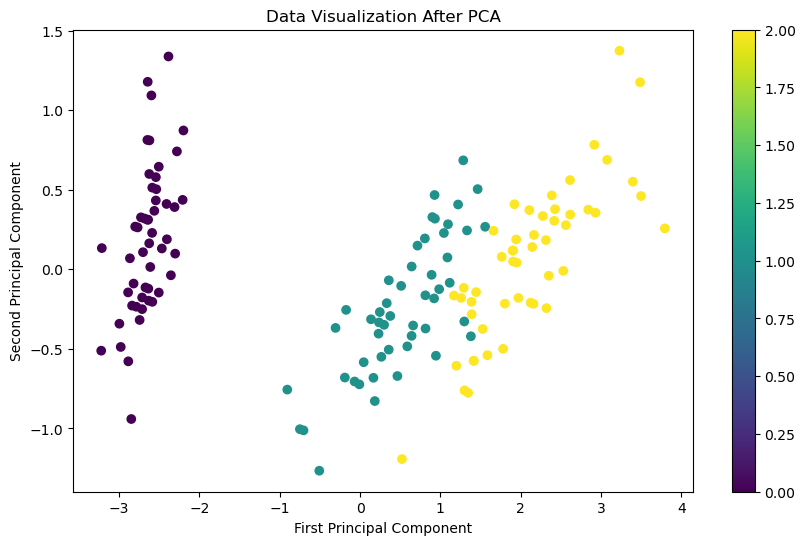

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_data(X, y):
    """Reduce dimensions and create a scatter plot"""
    # Reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Visualization After PCA')
    plt.show()

# Example: Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
visualize_data(X, y)